In [13]:
import math
import tensorflow as tf
import numpy as np 
import pandas as pd 
import pandas_datareader as pdd
import matplotlib.pyplot as plt
import seaborn as sb 

from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Embedding, Flatten, Dense
from math import *

import warnings 
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv(r"C:\Users\hp\OneDrive\Documents\GitHub\CodeAlpha_Stock_Prediction\AAPL.csv", index_col = 0)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [11]:
df.shape

(184, 6)

In [12]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,184.000000,184.000000,184.000000,184.000000,184.000000,1.840000e+02
mean,127.040245,129.918098,124.340381,127.352663,123.838032,1.910168e+08
std,24.314449,24.577906,24.176736,24.356534,25.655569,8.160281e+07
min,92.389999,93.769997,89.470001,90.519997,87.796822,3.839850e+07
25%,108.882499,112.362499,106.152502,109.204998,105.301765,1.273706e+08
50%,118.895000,120.865002,116.870003,119.190002,114.999730,1.744112e+08
75%,144.935005,147.695000,143.227493,144.704994,143.039467,2.207755e+08
max,180.289993,183.500000,177.619995,179.979996,179.979996,5.003630e+08


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, 2014-09-29 to 2018-03-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       184 non-null    float64
 1   High       184 non-null    float64
 2   Low        184 non-null    float64
 3   Close      184 non-null    float64
 4   Adj Close  184 non-null    float64
 5   Volume     184 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 10.1+ KB


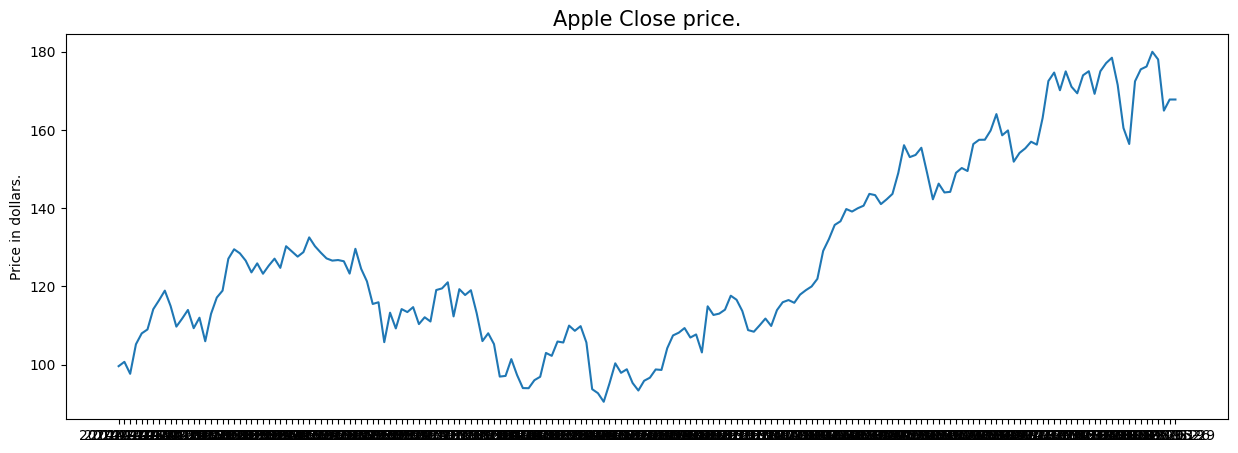

In [14]:
plt.figure(figsize=(15,5)) 
plt.plot(df['Close']) 
plt.title('Apple Close price.', fontsize=15) 
plt.ylabel('Price in dollars.') 
plt.show()

In [15]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [16]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

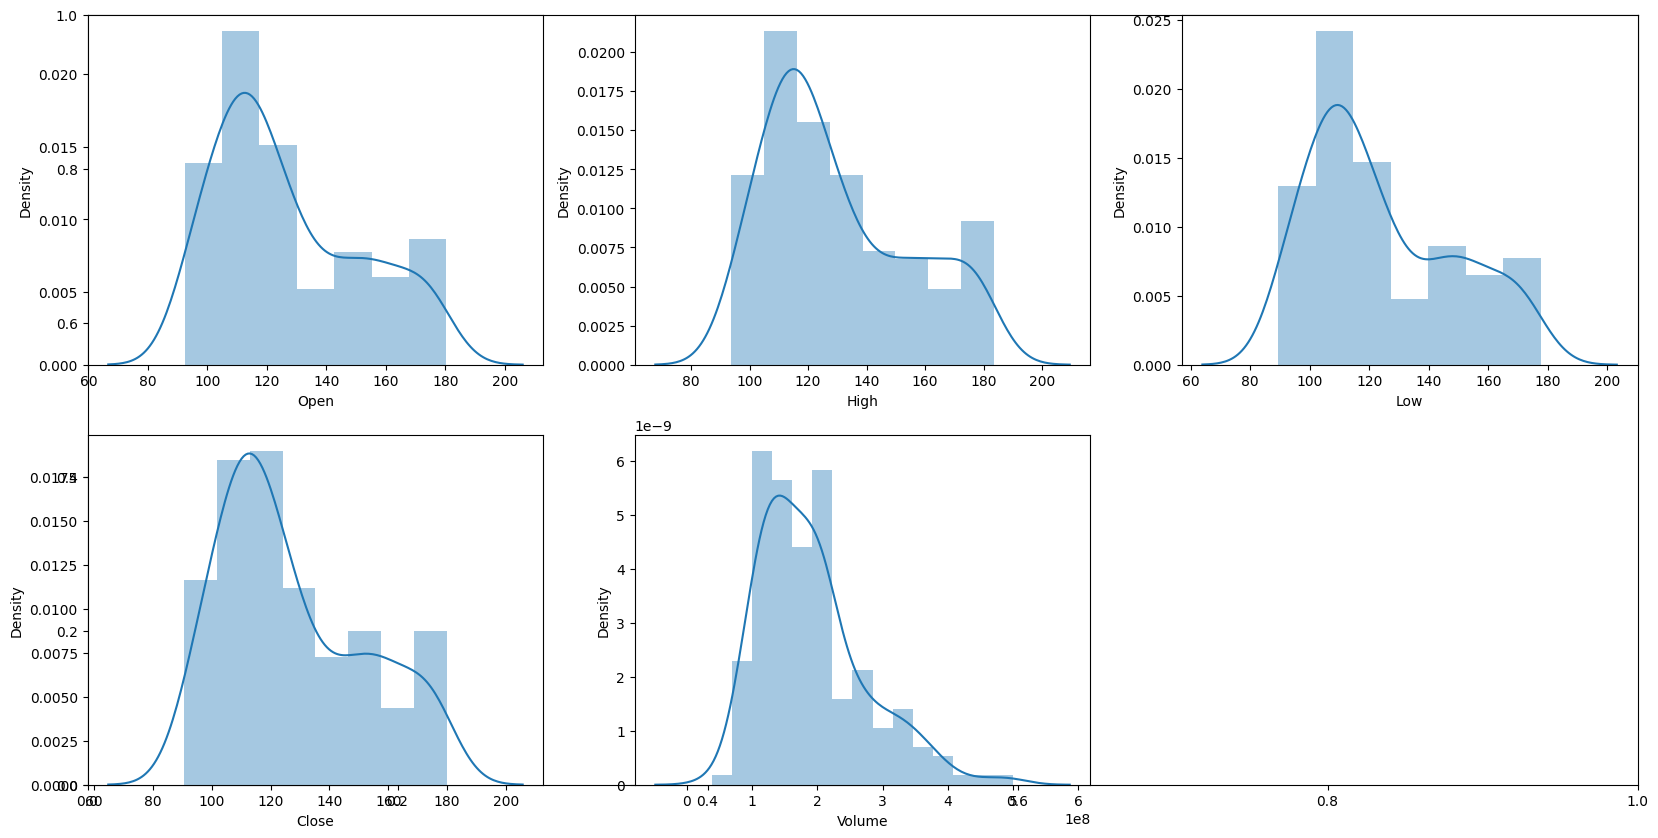

In [17]:
features = ['Open', 'High', 'Low', 'Close', 'Volume'] 

plt.subplots(figsize=(20,10)) 

for i, col in enumerate(features): 
    plt.subplot(2,3,i+1) 
    sb.distplot(df[col]) 
plt.show()

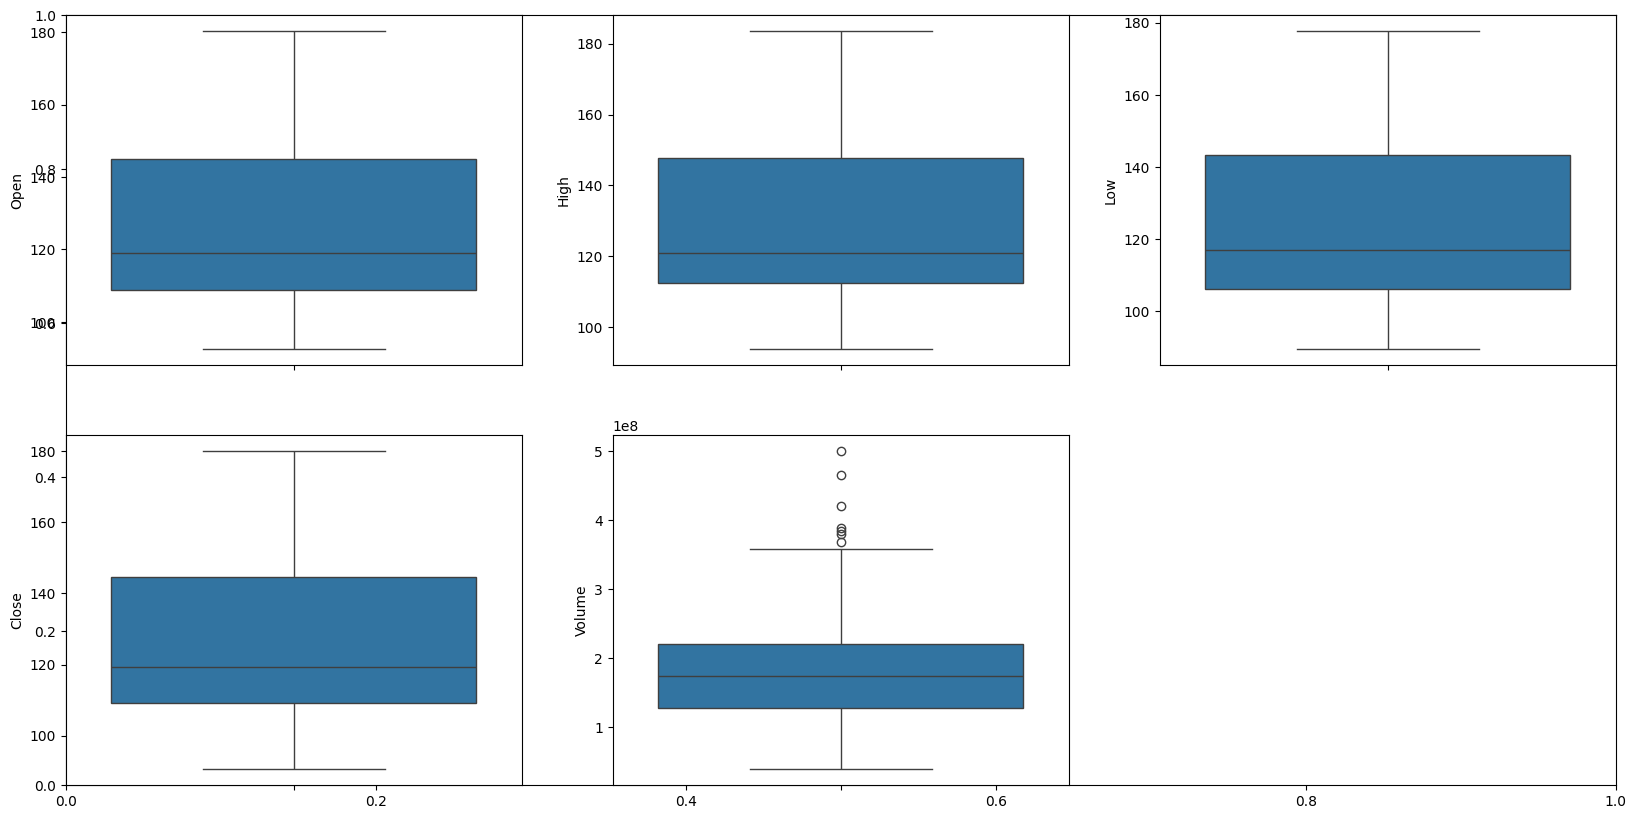

In [18]:
plt.subplots(figsize=(20,10)) 
for i, col in enumerate(features): 
    plt.subplot(2,3,i+1) 
    sb.boxplot(df[col]) 
plt.show()

In [19]:
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2014-09-29')
datetime_object

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [20]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600
...,...,...,...,...,...,...
2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700
2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500
2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700


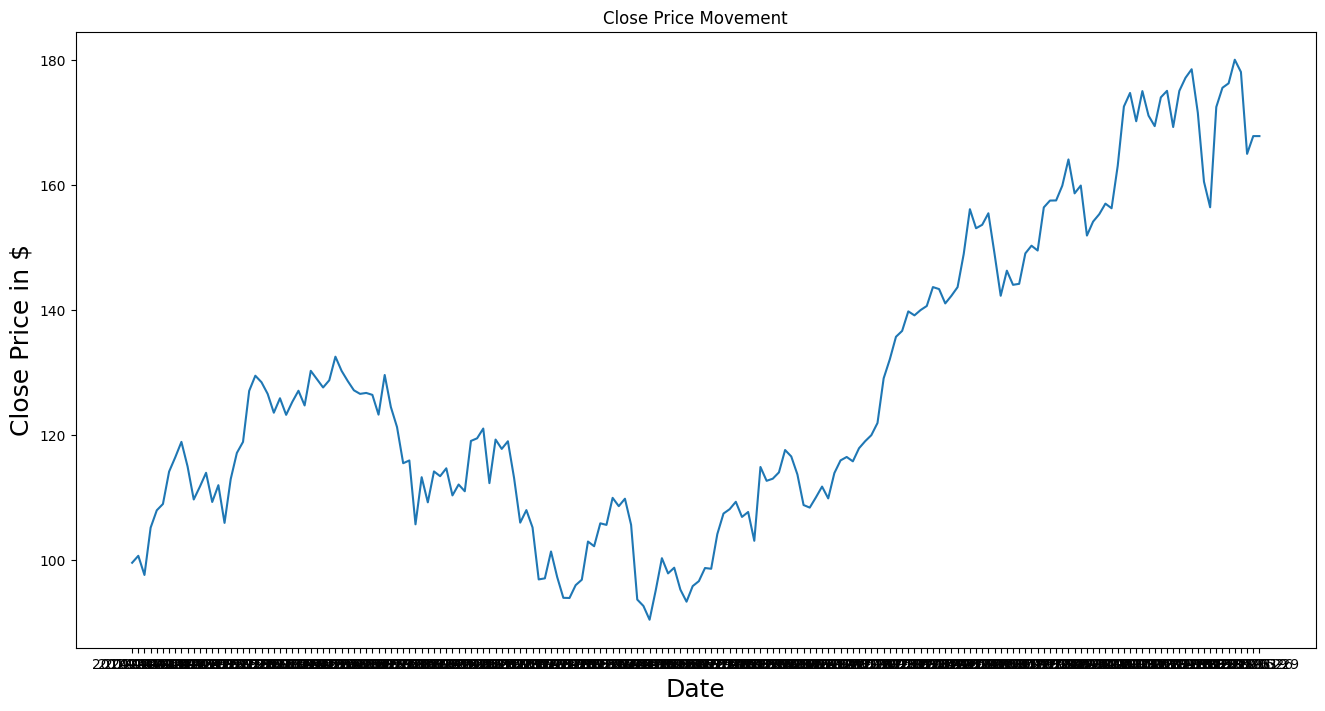

In [21]:
plt.figure(figsize=(16, 8))
plt.title('Close Price Movement')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in $', fontsize=18)
plt.show()

In [22]:
data = df.filter(['Close'])
dataset = data.values
len(dataset)

184

In [30]:
training_data_size = math.ceil(len(dataset)*.7)
training_data_size

129

In [31]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.10172151],
       [0.11412929],
       [0.079924  ],
       [0.1643193 ],
       [0.19539463],
       [0.20668461],
       [0.26447578],
       [0.29007382],
       [0.31757214],
       [0.27364189],
       [0.21473291],
       [0.23764814],
       [0.2623519 ],
       [0.21026163],
       [0.24021915],
       [0.17292646],
       [0.251062  ],
       [0.2977868 ],
       [0.31757214],
       [0.40867433],
       [0.4357255 ],
       [0.42410027],
       [0.40330876],
       [0.36966241],
       [0.39548408],
       [0.36586188],
       [0.38900071],
       [0.40889785],
       [0.38262915],
       [0.44444447],
       [0.42957747],
       [0.41471056],
       [0.42756548],
       [0.46970709],
       [0.44444447],
       [0.42622398],
       [0.40968032],
       [0.40330876],
       [0.40498551],
       [0.40152029],
       [0.36619721],
       [0.43706683],
       [0.3798346 ],
       [0.34406446],
       [0.27945451],
       [0.28437293],
       [0.17035552],
       [0.254

In [33]:
train_data = scaled_data[0:training_data_size, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)

[array([0.10172151, 0.11412929, 0.079924  , 0.1643193 , 0.19539463,
       0.20668461, 0.26447578, 0.29007382, 0.31757214, 0.27364189,
       0.21473291, 0.23764814, 0.2623519 , 0.21026163, 0.24021915,
       0.17292646, 0.251062  , 0.2977868 , 0.31757214, 0.40867433,
       0.4357255 , 0.42410027, 0.40330876, 0.36966241, 0.39548408,
       0.36586188, 0.38900071, 0.40889785, 0.38262915, 0.44444447,
       0.42957747, 0.41471056, 0.42756548, 0.46970709, 0.44444447,
       0.42622398, 0.40968032, 0.40330876, 0.40498551, 0.40152029,
       0.36619721, 0.43706683, 0.3798346 , 0.34406446, 0.27945451,
       0.28437293, 0.17035552, 0.25452721, 0.20959088, 0.26481111,
       0.25631567, 0.2704002 , 0.22199866, 0.24144876, 0.2293763 ,
       0.31924889, 0.3239437 , 0.34138164, 0.24390788, 0.3217081 ])]
[0.305052552035016]


In [34]:
x_train, Y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(69, 60, 1)

In [39]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [40]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
model.fit(x_train, y_train, batch_size=32, epochs=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1201 


In [35]:
test_data = scaled_data[training_data_size - 60: ,:]
x_test = []
y_test = dataset[training_data_size:, :] 
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [69]:
x_test = np.array(x_test)

In [61]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [62]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step


In [67]:
rmse = np.sqrt(np.mean(predictions - x_test)**2)
rmse

65.5926766317294

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


C:\Users\hp\AppData\Local\Temp\ipykernel_4656\82042339.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


ValueError: could not broadcast input array from shape (60,1) into shape (1,55)

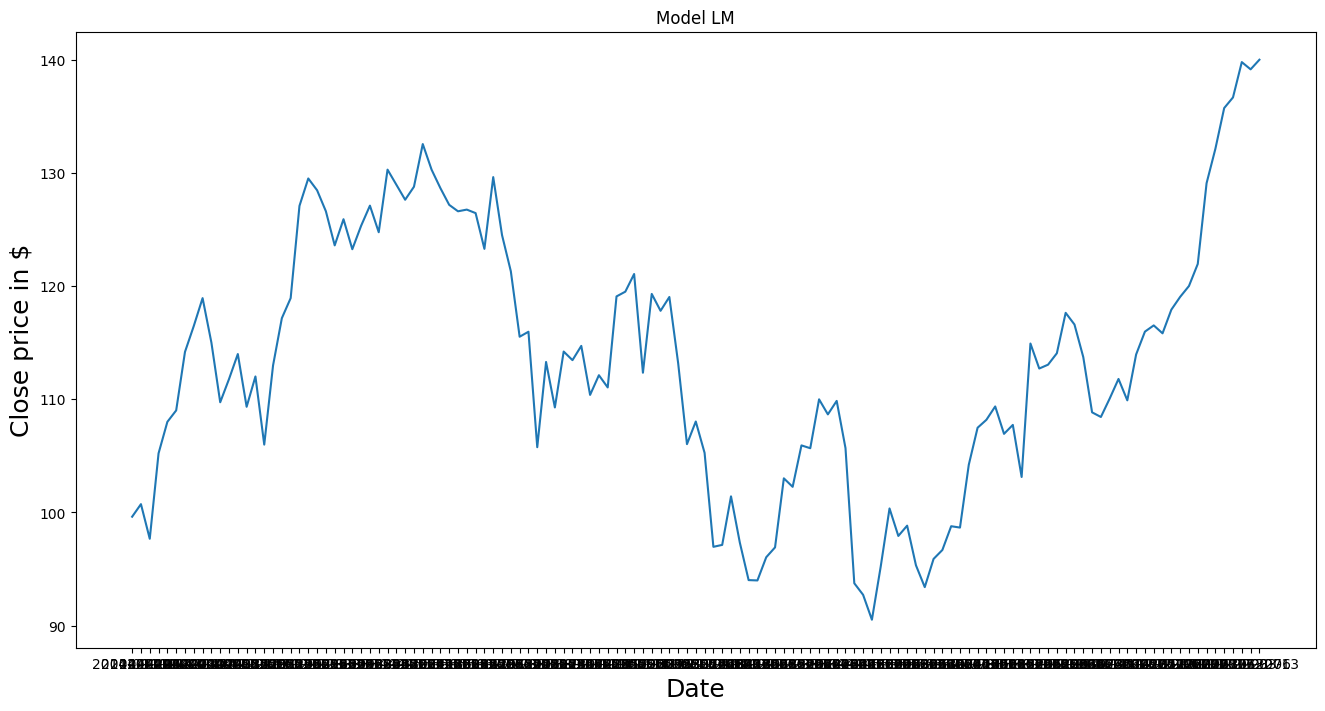

In [45]:
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Input

data = df.filter(['Close'])
train = data[:training_data_size]
valid = data[training_data_size:]
predictions = model.predict(x_test)
valid['predictions'] = predictions
plt.figure(figsize=(16, 8))
plt.title('Model LM')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price in $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show